In [1]:
# Flickr
import networkx as nx
G = nx.Graph()

### Preprocessing

In [2]:
file1 = open(r'C:\Users\DELL\Downloads\Compressed\flickr_UsrResTag\flickr-stream_U-R-T', 'r',  encoding="utf8")
Lines = file1.readlines()
print(len(Lines))

112900000


In [3]:
from tqdm import tqdm
node1_List = []
node2_List = []
time_List = []
# Strips the newline character
for line in tqdm(range(0, 1000000)):
    time, node1, node2, _ = Lines[line].split("\t")
    node1_List.append(node1)
    node2_List.append(node2)
    time_List.append(time)

100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:01<00:00, 837175.40it/s]


In [10]:
for edge in tqdm(range(len(node1_List))):
    node1=node1_List[edge]
    node2=node2_List[edge]
    G.add_edge(node1,node2)
Degree_count_from={}
Degree_count_to={}
Degree_from={}
Degree_to={}
node1_List_set=set(node1_List)
node2_List_set=set(node2_List)

for x in node1_List_set:
  # if(x not in Degree_count_from):
      Degree_from[x]=G.degree(x)
  # else:
  #   print("hi")
  #   break

for y in node2_List_set:
  # if(x not in Degree_count_to):
      Degree_to[y]=G.degree(y)


100%|██████████████████████████████████████████████████████████████████████| 1000000/1000000 [11:59<00:00, 1388.94it/s]


### Degree Distribution : Users

No handles with labels found to put in legend.


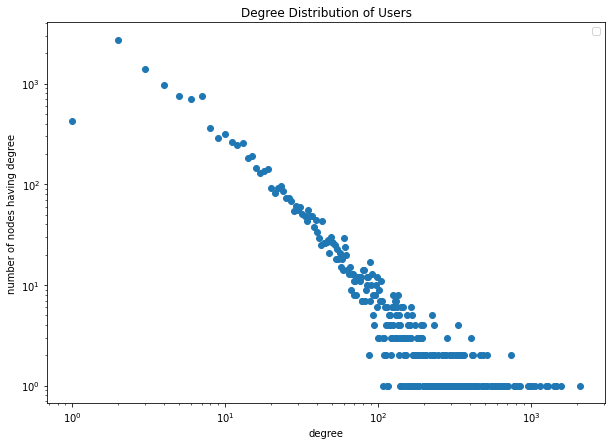

In [12]:
list_of_degrees=list(Degree_from.values())
from_degree_counts={}
for deg in list_of_degrees:
    if(deg in from_degree_counts):
        from_degree_counts[deg]+=1
    else:
        from_degree_counts[deg]=1
max_from_degree_freq=max(from_degree_counts.values())


from_degree_counts1=from_degree_counts.copy()

from_distis=dict((sorted(from_degree_counts1.items())))
from_max_degree_count=max(from_distis.values())
# total_nodes=sum(distis.values())
# from_distis.update((x, round(y/from_max_degree_count,2)) for x, y in from_distis.items())
# x_axis=list(from_distis.keys())[1:len(from_distis.keys())]
# y_axis=list(from_distis.values())[1:len(from_distis.values())]

x_axis=list(from_distis.keys())
y_axis=list(from_distis.values())

import matplotlib.pyplot as plt 
import matplotlib
plt.loglog(x_axis, y_axis,"o") 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('degree') 

plt.ylabel('number of nodes having degree') 
 
plt.title('Degree Distribution of Users') 
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

### Degree Distribution : Tags

No handles with labels found to put in legend.


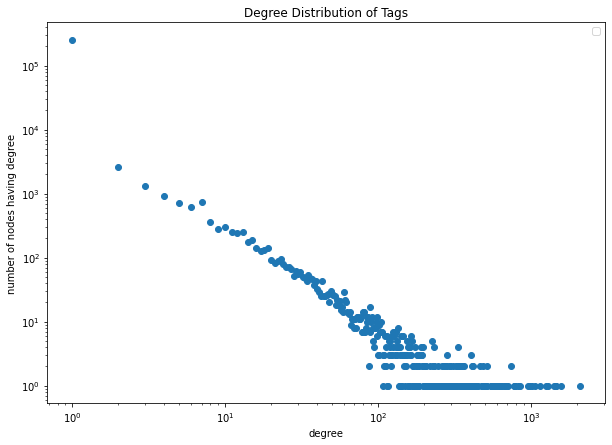

In [13]:
list_of_degrees=list(Degree_to.values())
to_degree_counts={}
for deg in list_of_degrees:
    if(deg in to_degree_counts):
        to_degree_counts[deg]+=1
    else:
        to_degree_counts[deg]=1
max_to_degree_freq=max(to_degree_counts.values())


to_degree_counts1=to_degree_counts.copy()

to_distis=dict((sorted(to_degree_counts1.items())))
to_max_degree_count=max(to_distis.values())
# total_nodes=sum(distis.values())
# to_distis.update((x, round(y/to_max_degree_count,2)) for x, y in to_distis.items())
# x_axis=list(to_distis.keys())[1:len(to_distis.keys())]
# y_axis=list(to_distis.values())[1:len(to_distis.values())]

x_axis1=list(to_distis.keys())
y_axis1=list(to_distis.values())

import matplotlib.pyplot as plt 
import matplotlib
# plt.scatter(x_axis1, y_axis1, label = "fraction") 
plt.loglog(x_axis1, y_axis1,"o" ) 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('degree') 

plt.ylabel('number of nodes having degree') 
 
plt.title('Degree Distribution of Tags') 
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

In [14]:
node1_degree_dict = {}
node2_degree_dict = {}
total_degree = 0
node_time_dict = {}
for i in tqdm(range(0, len(node2_List))):
    node1 = node1_List[i]
    node2 = node2_List[i]
    if node1 not in node1_degree_dict:
        node1_degree_dict[node1] = 0
    node1_degree_dict[node1] += 1
    
    if node2 not in node2_degree_dict:
        node2_degree_dict[node2] = 0
    node2_degree_dict[node2] += 1
    
    total_degree += 2

100%|███████████████████████████████████████████████████████████████████| 1000000/1000000 [00:00<00:00, 1104945.92it/s]


In [15]:
probability_dict = {}
for key, value in node1_degree_dict.items():
    probability_dict[key] = value/total_degree

In [16]:
print(len(node1_degree_dict))
print(len(probability_dict))

13101
13101


### Network Evolution : Probability vs Destination Degree

No handles with labels found to put in legend.


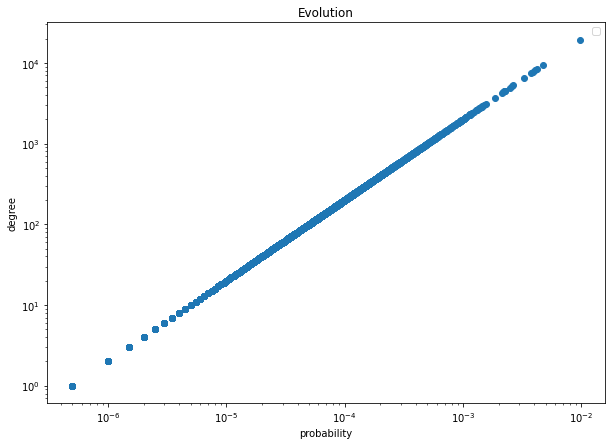

In [17]:
import matplotlib.pyplot as plt 
import matplotlib

plt.loglog(list(probability_dict.values()), list(node1_degree_dict.values()), "o") 
# plt.scatter(list(probability_dict.values()), list(movie_degree_dict.values()), label = "scaled frequencies") 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('probability') 

plt.ylabel('degree')
 
plt.title('Evolution')
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)